In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#load data
data = pd.read_csv("E:\Desktop\Machine-Learning-Collection\Data Folder\study_data.csv")

In [3]:
data.head(20)

,repetition_time,study_time,knowledge_level
0,0.00,0.00,Low
1,0.24,0.90,High
2,0.25,0.33,Low
3,0.65,0.30,High
4,0.98,0.24,Low
5,0.10,0.66,High
6,0.29,0.56,High
7,0.40,0.01,Low
8,0.72,0.25,Low
9,0.20,0.85,High


In [4]:
#exploring data a bit
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   repetition_time  258 non-null    float64
 1   study_time       258 non-null    float64
 2   knowledge_level  258 non-null    object 
dtypes: float64(2), object(1)
memory usage: 6.2+ KB


In [5]:
data.describe()

,repetition_time,study_time
count,258.000000,258.000000
mean,0.432713,0.458539
std,0.248108,0.255211
min,0.000000,0.000000
25%,0.250000,0.250000
50%,0.330000,0.500000
75%,0.647500,0.660000
max,0.990000,0.930000


In [7]:
data['knowledge_level'].value_counts()

High    151
Low     107
Name: knowledge_level, dtype: int64

In [8]:
#splitting data and setup
x = data.drop(data.columns[[2]], axis = 1)
y=data['knowledge_level']

In [10]:
x.head()

,repetition_time,study_time
0,0.00,0.00
1,0.24,0.90
2,0.25,0.33
3,0.65,0.30
4,0.98,0.24


In [11]:
#encoding data
y = pd.get_dummies(data,columns = ['knowledge_level'])

In [12]:
y.head()

,repetition_time,study_time,knowledge_level_High,knowledge_level_Low
0,0.00,0.00,0,1
1,0.24,0.90,1,0
2,0.25,0.33,0,1
3,0.65,0.30,1,0
4,0.98,0.24,0,1


In [15]:
#splitting data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y['knowledge_level_High'],test_size=0.25, random_state=0 )

In [16]:
#scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.fit_transform(xtest)

In [17]:
#training
from sklearn.naive_bayes import GaussianNB
nvb = GaussianNB()
nvb.fit(xtrain,ytrain)

GaussianNB()

In [18]:
y_p = nvb.predict(xtest)

In [19]:
#Results
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,y_p)

In [20]:
cm

array([[26,  3],
       [ 4, 32]], dtype=int64)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


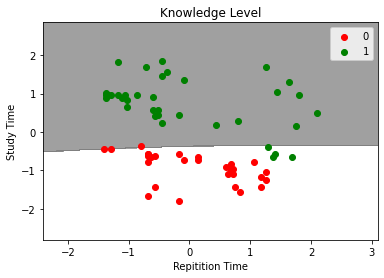

In [23]:
#visualising model prediction
from matplotlib.colors import ListedColormap
X_set, y_set = xtest, ytest
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, nvb.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('white', 'grey')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Knowledge Level')
plt.xlabel('Repitition Time')
plt.ylabel('Study Time')
plt.legend()
plt.show()

    
                   